> ### EEE3314: Introduction to Artificial Intelligence

# Assignment V: Adaboost

### *Assignement Instructions:*
- **Due date**: 11 PM, Nov. 12 (Fri), 2021
- **File name**: [ID_Name_HW5.ipynb]
- Write a program implementing a particular algorithm to solve a given problem.   
- **Report and discuss your results. Analyze the algorithm, theoretically and empirically.**

### *Collaboration policy:*
- You may discuss the questions with your friends, but each student writes their own codes and answers.  
- **Cheating is strictly prohibited, and will be considered academic dishonesty. This is not how you want to start your career as an engineer.** We expect that most students can distinguish between helping other students and cheating. Explaining the meaning of a question or discussing a way of approaching a solution is an interaction. But you should write your homework solution strictly by yourself so that your hands and eyes can help you internalize the subject matter. You should acknowledge everyone whom you have worked with, or who has given you any significant ideas about the homework
- Signiture: <span style="color:blue">[Insert your ID HERE] [Insert your name HERE]</span>

In [544]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2021-11-11 20:50:06.333805


In [545]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Problem statement

We will use datasets generated from ```sklearn.dataset.make_classification``` and ```sklearn.dataset.make_mooons```. Let's first viaualize the $\texttt{classification}$ and $\texttt{moon}$ datasets with the ```scatter``` function from ```matplotlib.pyplot```.

**Classification dataset**

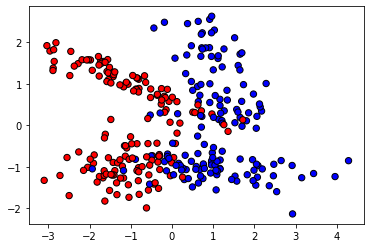

In [546]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons
from sklearn.datasets import make_classification


cm_bright = ListedColormap(['#FF0000', '#0000FF'])
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=cm_bright, edgecolors='k')
plt.show()

**Moon dataset**

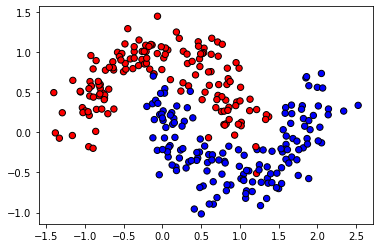

In [547]:
X,y = make_moons(n_samples=300, noise=0.2, random_state=0)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=cm_bright, edgecolors='k')
plt.show()

We will implement the $\texttt{AdaBoost}$ algorithm. It first trains a classifier on an original dataset and then fits additional classifier on the same dataset but with different weights for traing samples. For example, the weights for incorrectly classified samples increases in order to focus more on hard or important cases, and vice versa.

Let's apply $\texttt{AdaBoost}$ these two datasets.

**NOTE**: In $\texttt{DecisionStump}$ and $\texttt{AdaBoost}$ implementation, exploiting ```sklearn.tree``` and ```sklearn.ensemble``` (or equivalent) **will not be allowed**. You will get no credit otherwise.

### P1. AdaBoost

P1.1 Implement a decision stump (```DecisionStump``` class) using the **threshold split selection algorithm**. A decision stump is a one-level decision tree which makes a prediction using a single input feature. (*15 points*)  
> **Quality metric**: Classification error that computes the fraction of mistakes.  
> **Prediction**: For each node, $\hat{y}=\text{major class}.$

*Refer the lecture note 11 p.53-59.*
  
  
P1.2 Implement an adaboost (```AdaBoost``` class) for binary classification. Note that the AdaBoost algorithm uses a **weighted sampling with replacement** to learn the weak classifier $f_{t}(\mathbf{x})$ with data weights $\alpha$. (*50 points*)  
> **Weighted sampling with data weight**: This samples data points from the original dataset with corresponding sampling probabilities (i.e., weights for individual training samples).
>> For example, let's suppose the following data points $\mathbf{x}$ and corresponding weights $\alpha$: $\mathbf{x}=[x_1, x_2, x_3]$ and $\alpha = [0.1, 0.6, 0.3]$. In the weighted sampling procedure, $x_1$, $x_2$, and $x_3$ are chosen with probabilities of $0.1$, $0.6$, and $0.3$, respectively. That is, the data point with a higher weight is more likely to be chosen.
>  
> **Quality metric**: Classification error that computes the fraction of mistakes.  
> **Compute coefficient**: $\hat{w}_t = \frac{1}{2} \ln \left( \frac{1 - \epsilon_t}{\epsilon_t} \right)$  
> **Recompute weight**: $\alpha_{t+1}^{i} = \alpha_{t}^{i} e^{{-\hat{w}_{t} y_{i} f_{t}(\mathbf{x})}}$ , where $y_{i} = 1 \text{ or} -1$.  
> **Normalize weight**: $\alpha_{t}^{i} = \frac{\alpha_{t}^{i}}{\sum_{i=1}^{N} \alpha_{t}^{i}}$  
> **Prediction**: $\hat{\mathbf{y}}=\text{sign} \left( \sum_{t=1}^{T} \hat{w_t} f_t(\mathbf{x}) \right)$  
> **Save weak classifier**: Use ```dictionary```, i.e., {```'coefficient'```: $\hat{w}_t$, ```'classifier'```: $f_t(\mathbf{x})$}. Then append the dictionary to the attribute list (```self.classifiers```).  

*Refer the lecture note 12 p.35-37.*

P1.3 Run the code provied to plot the weighted error and the coefficient of each classifier. Analyze the results and relationship between the weighted errors and the coefficients. (*5 points*)  

P1.4 Implement the ```compute_staged_accuracies``` function that inputs boosted classifiers (i.e., a list of dictionary that contains 'coefficient' and 'classifier' as keys), a training dataset, a test dataset, and outputs the prediction accuracies on training and test datasets. Plot the accuracies on training and testing samples, over the number of classiferes. Use the $\frac{\text{number of correct predictions}}{\text{total number of samples}}$ to compute the accuracy. (*5 points*)



### P2. Results Analysis

P2.1 Analyze and contrast the logistic regression and adaboost in terms of objective functions and how to optimize the weights of features in logistic regression and coefficients of weak classifiers in adaboost, theoretically. (*5 points*)

P2.2 Run the code provied to compute train and test accuracies of each classification method. Analyze and contrast the classification methods (logistic regression, decision stump, decision tree, and boosted decision tree) in terms of train and test accuracies. (*10 points*)

P2.3 Run the code provied to plot decision boundaries and prediction accuracies on test dataset. Analyze and contrast the decision boundaries of the classification methods (logistic regression, decision tree, and boosted decision tree). (*10 points*)

---

## Results

In [548]:
from copy import deepcopy

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.datasets
from sklearn.model_selection import train_test_split

from project5 import *

### Prepare Dataset

In [549]:
X, y = make_classification(n_samples=400, n_features=15, n_redundant=0, n_informative=12, random_state=1, n_clusters_per_class=2)
y[y == 0] = -1

n_split = 250

X_train, X_test = X[:n_split], X[n_split:]
y_train, y_test = y[:n_split], y[n_split:]

In [550]:
print(X_train.shape)
print(X_test.shape)

(250, 15)
(150, 15)


---

### P1.1

In [551]:
stump = DecisionStump()
stump.fit(X_train, y_train)

print(f"train: {np.average(stump.predict(X_train) == y_train)}, test: {np.average(stump.predict(X_test) == y_test)}")

train: 0.728, test: 0.7333333333333333


In [552]:
stump.left_prediction

1

In [553]:
stump.right_prediction

-1

In [554]:
stump.threshold

0.3429866544424358

In [555]:
stump.selected_feature

2

---

### P1.2

In [556]:
adaboost_classifier = AdaBoost(100)
adaboost_classifier.fit(X_train, y_train)

print(f"train: {np.average(adaboost_classifier.predict(X_train) == y_train)}, test: {np.average(adaboost_classifier.predict(X_test) == y_test)}")

train: 0.908, test: 0.8333333333333334


In [557]:
classifiers = adaboost_classifier.classifiers
print(len(classifiers))
print(classifiers[0].keys())
print(classifiers[0].values())

100
dict_keys(['classifier', 'coefficient'])
dict_values([<project5.DecisionStump object at 0x0000028FCC0A4BE0>, 0.4922494909503443])


In [558]:
adaboost_classifier.error_history

[0.272,
 0.328,
 0.292,
 0.292,
 0.304,
 0.308,
 0.324,
 0.324,
 0.348,
 0.336,
 0.328,
 0.356,
 0.352,
 0.352,
 0.356,
 0.36,
 0.332,
 0.352,
 0.336,
 0.348,
 0.328,
 0.384,
 0.352,
 0.372,
 0.376,
 0.328,
 0.348,
 0.368,
 0.336,
 0.352,
 0.348,
 0.304,
 0.364,
 0.324,
 0.344,
 0.34,
 0.316,
 0.36,
 0.36,
 0.312,
 0.352,
 0.344,
 0.32,
 0.32,
 0.348,
 0.376,
 0.34,
 0.388,
 0.364,
 0.336,
 0.344,
 0.376,
 0.372,
 0.352,
 0.372,
 0.348,
 0.352,
 0.368,
 0.32,
 0.368,
 0.36,
 0.376,
 0.372,
 0.34,
 0.244,
 0.348,
 0.348,
 0.34,
 0.352,
 0.324,
 0.368,
 0.348,
 0.364,
 0.364,
 0.3,
 0.372,
 0.344,
 0.304,
 0.384,
 0.368,
 0.372,
 0.34,
 0.388,
 0.344,
 0.372,
 0.356,
 0.352,
 0.364,
 0.364,
 0.384,
 0.332,
 0.36,
 0.38,
 0.364,
 0.368,
 0.332,
 0.352,
 0.34,
 0.336,
 0.38]

In [559]:
coefficients = [classifier['coefficient'] for classifier in adaboost_classifier.classifiers]
    
coefficients

[0.4922494909503443,
 0.3586223660695028,
 0.442845145712719,
 0.442845145712719,
 0.4141609794640989,
 0.40474308632204753,
 0.36772478012531734,
 0.36772478012531734,
 0.31392104107608937,
 0.3405854947566147,
 0.3586223660695028,
 0.29638399762616163,
 0.30512976037708883,
 0.30512976037708883,
 0.29638399762616163,
 0.28768207245178096,
 0.34957660231007853,
 0.30512976037708883,
 0.3405854947566147,
 0.31392104107608937,
 0.3586223660695028,
 0.2363022054728964,
 0.30512976037708883,
 0.2618231560975261,
 0.2532806124897666,
 0.3586223660695028,
 0.31392104107608937,
 0.27040322798896327,
 0.3405854947566147,
 0.30512976037708883,
 0.31392104107608937,
 0.4141609794640989,
 0.2790223478516907,
 0.36772478012531734,
 0.3227595657853454,
 0.331647108705132,
 0.38610785201781916,
 0.28768207245178096,
 0.28768207245178096,
 0.3953928250619306,
 0.30512976037708883,
 0.3227595657853454,
 0.37688590118819,
 0.37688590118819,
 0.31392104107608937,
 0.2532806124897666,
 0.331647108705132

In [560]:
adaboost_classifier.data_weight

array([0.00114662, 0.00030883, 0.00505665, 0.03666905, 0.01763805,
       0.00159368, 0.00215253, 0.00027808, 0.00154442, 0.00313573,
       0.00417865, 0.00051943, 0.0073795 , 0.00073716, 0.00926991,
       0.00136212, 0.00101944, 0.00282076, 0.00193769, 0.0185101 ,
       0.02377134, 0.01334142, 0.00066484, 0.00187431, 0.01285902,
       0.00773304, 0.00087516, 0.00072861, 0.01276934, 0.00173326,
       0.00031671, 0.00455052, 0.00094226, 0.00053179, 0.0011434 ,
       0.00206218, 0.00127451, 0.00145807, 0.00270296, 0.00252543,
       0.0007206 , 0.00410866, 0.00082352, 0.00298136, 0.00139756,
       0.00070857, 0.00491925, 0.00112189, 0.01715466, 0.00057467,
       0.00121813, 0.00198984, 0.00369111, 0.00052133, 0.0034514 ,
       0.00285937, 0.00157629, 0.00082625, 0.00072773, 0.00888804,
       0.00233871, 0.00429723, 0.00055098, 0.00628427, 0.00440864,
       0.00451137, 0.00059285, 0.00102323, 0.00105484, 0.00120746,
       0.00691608, 0.01474238, 0.00054398, 0.00132884, 0.01003

---

### P1.3

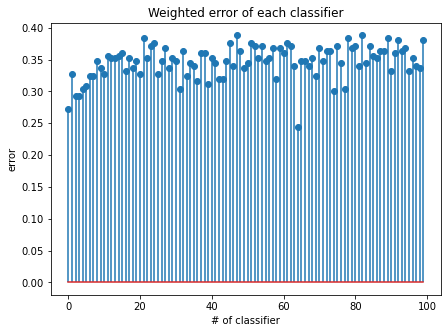

In [561]:
plt.figure(figsize=[7, 5])

plt.stem(adaboost_classifier.error_history)
plt.title('Weighted error of each classifier')
plt.xlabel('# of classifier')
plt.ylabel('error')
plt.show()

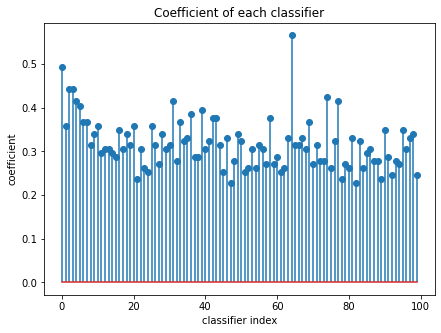

In [562]:
plt.figure(figsize=[7, 5])

plt.stem(coefficients)
plt.title('Coefficient of each classifier')
plt.xlabel('classifier index')
plt.ylabel('coefficient')
plt.show()

Describe your answer here

**error가 큰 stump는 작은 coefficient를 가져 adaboost에 상대적으로 적은 영향을 줌.**  
- 아래 error vs. coeff 그래프에서도 확인 가능  
    
**이전에 저장된 classifier의 수가 늘어날 수록 해당 classfier의 error가 커지면서 특정 값으로 수렴함.**  
- 상대적으로 prediction이 잘 맞지 않는 feature가 부각되면서 error가 커져보임.

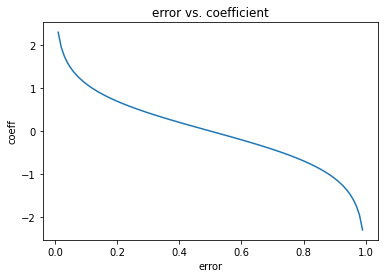

In [580]:
error = np.arange(0.01, 1, 0.01)
coeff = np.log((1 - error) / error) / 2

plt.figure()
plt.plot(error, coeff)
plt.xlabel("error")
plt.ylabel("coeff")
plt.title("error vs. coefficient")
plt.show()

---

### P1.4

In [563]:
classifiers = adaboost_classifier.classifiers    

acc_train, acc_test = compute_staged_accuracies(classifiers, X_train, y_train, X_test, y_test)

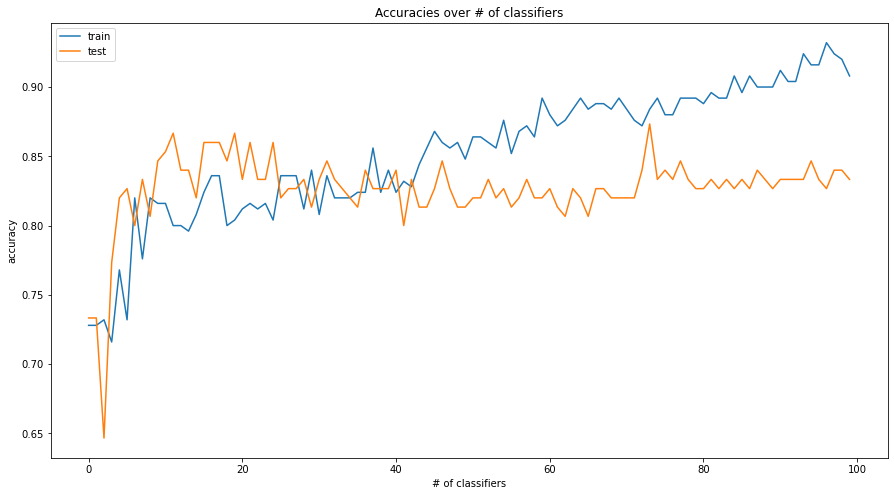

In [564]:
plt.figure(figsize=[15, 8])

plt.plot(acc_train, label='train')
plt.plot(acc_test, label='test')
plt.title('Accuracies over # of classifiers')
plt.xlabel('# of classifiers')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Describe your answer here

- classifier의 수가 늘어날수록 training accuracy가 커짐.  
- test accuracy는 커지다가 일정 수준에서 유지됨.  

---

### P2.1 

Describe your analysis here.

**logistic regression**  
- objective function  
아래 그래프 참고, prediction이 잘 되면 cost가 낮아짐.

- weight update  
  cost function에 gradient descent 기법을 이용하여 cost가 가장 낮은 지점을 찾음.



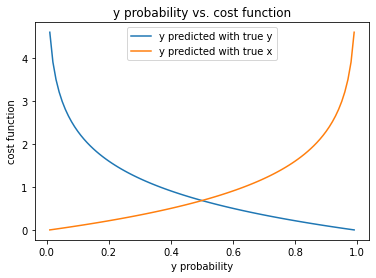

In [599]:
pred_y = np.arange(0.01, 1, 0.01)

## Prediction with two classes (x, y)

cost_y = -np.log(pred_y)
cost_x = -np.log(1-pred_y)

plt.plot(pred_y, cost_y, label='y predicted with true y')
plt.plot(pred_y, cost_x, label='y predicted with true x')

plt.title('y probability vs. cost function')
plt.legend()

plt.xlabel('y probability')
plt.ylabel('cost function')

plt.show()

**adaboost**

- classifier의 error 크기에 따라 해당 classifier의 coefficient를 설정. (P1.3에서 error vs. coefficient 그래프 참고)  
- data weight은 prediction error에 정비례하게 update됨. ($\alpha_{t+1}^{i} = \alpha_{t}^{i} e^{{-\hat{w}_{t} y_{i} f_{t}(\mathbf{x})}}$ , where $y_{i} = 1 \text{ or} -1$)  
  특정 feature를 과장시켜 해당 feature에 대한 error를 줄이고 이를 통해 전체적인 error를 줄임.  
  과장되는 정도는 coefficient의 크기에 따라 결정됨.  


**logistic regression vs. adaboost**  
logistic regression은 objective function을 이용해 최적의 weight 값을 구함.  
adaboost는 error를 특정 식에 대입하여 coefficient 값을 구함.


---

### P2.2

**Decision Stump**

In [565]:
stump = DecisionStump()
stump.fit(X_train, y_train)
print(f"train: {np.average(stump.predict(X_train) == y_train)}, test: {np.average(stump.predict(X_test) == y_test)}")

train: 0.728, test: 0.7333333333333333


**Decision Tree**

In [566]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print(f"train: {np.average(tree.predict(X_train) == y_train)}, test: {np.average(tree.predict(X_test) == y_test)}")

train: 1.0, test: 0.8066666666666666


**Logisitc Regression**

In [567]:
from sklearn.linear_model import LogisticRegression

regrssor = LogisticRegression()
regrssor.fit(X_train, y_train)
print(f"train: {np.average(regrssor.predict(X_train) == y_train)}, test: {np.average(regrssor.predict(X_test) == y_test)}")

train: 0.82, test: 0.84


**Adaboost**

In [568]:
print(f"train: {np.average(adaboost_classifier.predict(X_train) == y_train)}, test: {np.average(adaboost_classifier.predict(X_test) == y_test)}")

train: 0.908, test: 0.8333333333333334


Describe your answer here

- Decision tree와 stump를 비교했을 때, depth 차이에 의해 tree 경우의 train/test accuracy가 stump보다 높게 나타남.  
- Logistic regression은 tree보다 낮은 accuracy를 보임. 이유는 tree의 경우 logistic regression보다 boundary를 더 많이 설정할 수 있기 때문.  
- Adaboost는 여러 stump model을 이용해 하나의 model을 생성하기 때문에 stump보다 좋은 accuracy를 보임.  
- 그리고 Adaboost를 tree와 비교했을 때, training accuracy는 작지만 test accuracy는 더 크게 나옴. Adaboost를 통해 overfitting을 방지할 수 있어 이런 결과가 도출됨.

---

### P2.3

**Do not use sklearn implementation of Adaboost.**

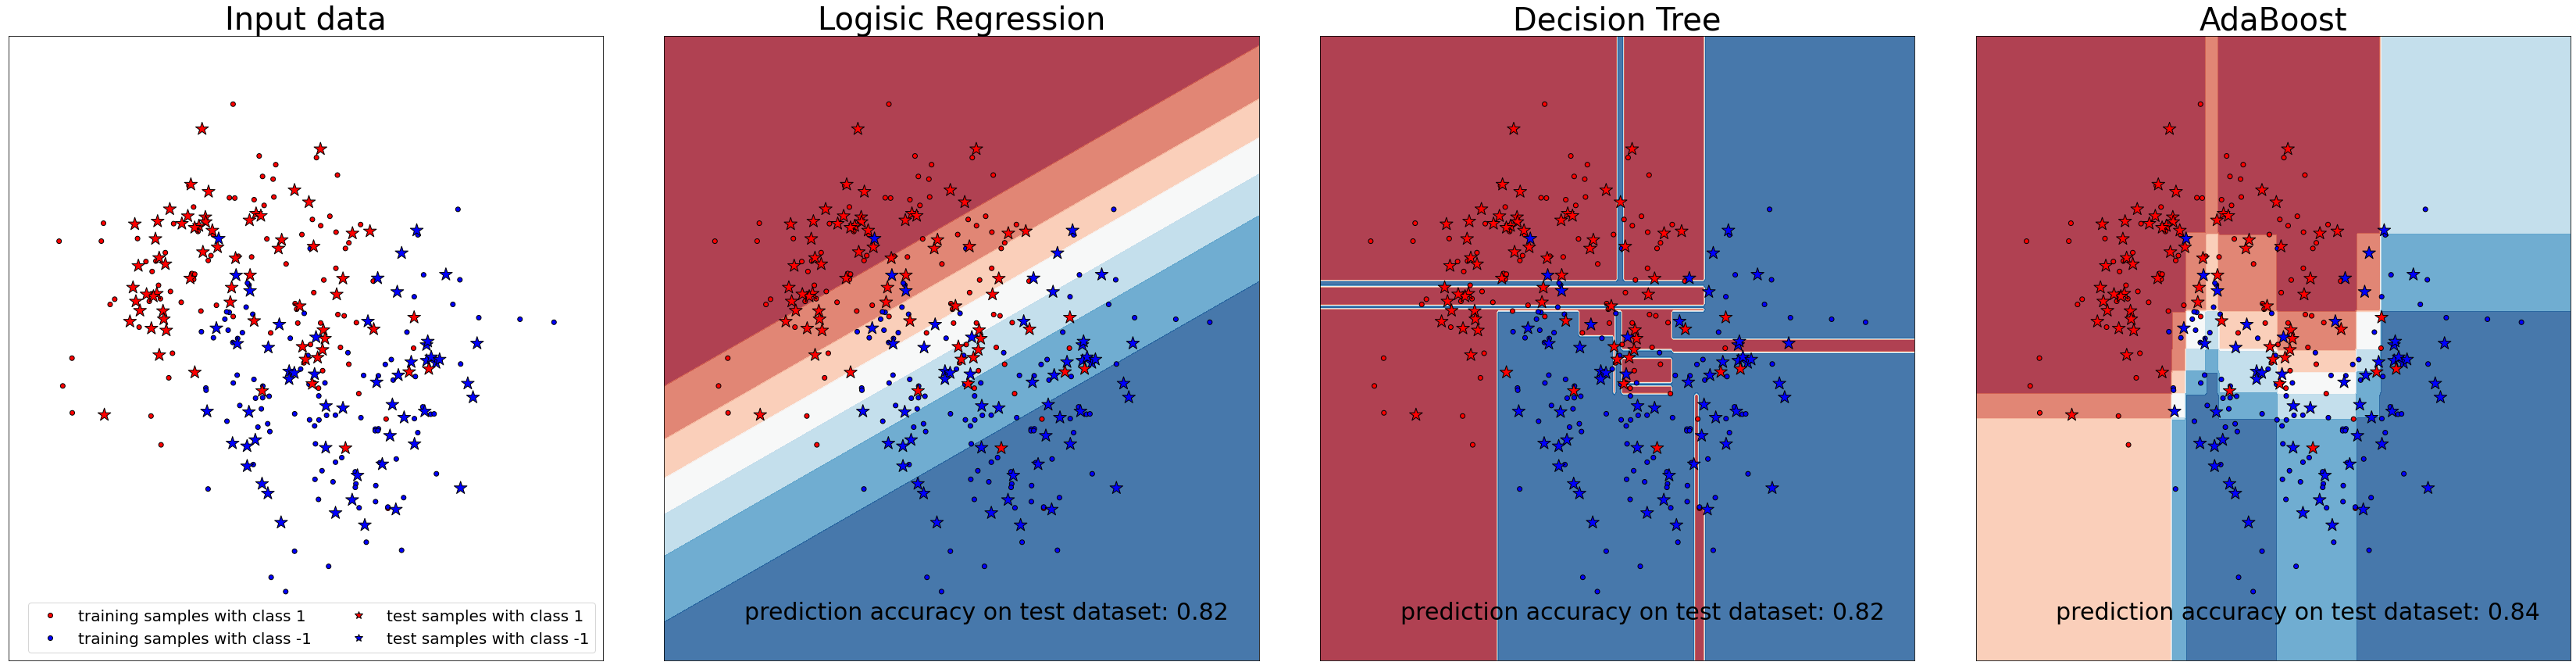

In [594]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

names = ["Logisic Regression", "Decision Tree", "AdaBoost"]


classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    AdaBoost(20) # your implementation.
]

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='training samples with class 1', mfc='#FF0000', mec='k'),
    Line2D([0], [0], marker='o', color='w', label='training samples with class -1', mfc='#0000FF', mec='k'),
    Line2D([0], [0], marker='*', color='w', label='test samples with class 1', mfc='#FF0000', mec='k', ms=10),
    Line2D([0], [0], marker='*', color='w', label='test samples with class -1', mfc='#0000FF', mec='k', ms=10)
]


figure = plt.figure(figsize=(48, 12))
i = 1

# prepare dataset.
X, y = make_moons(n_samples=300, noise=0.4, random_state=0)
y[y == 0] = -1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

# generate meshgrid for decision boundaries.
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# plot.
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

ax = plt.subplot(1, len(classifiers) + 1, 1)
ax.set_title("Input data", size=40)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k', label='train samples')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', s=300, marker='*', label='test samples')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.legend(handles=legend_elements, ncol=2, loc='lower right', fontsize=20)
ax.set_xticks(())
ax.set_yticks(())

# iterate over classifiers
i += 1
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = np.average(clf.predict(X_test) == y_test)
    
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', s=300, marker='*')

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    ax.set_title(name, size=40)
    ax.text(xx.max() - .3, yy.min() + .3, ('prediction accuracy on test dataset: %.2f' % score).lstrip('0'), size=30, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()

- Logistic regression의 경우 decision tree나 adaboost보다 단순한 boundary를 가지고 있다. 
- Decision tree의 경우 복잡한 boundary를 가지고 prediction을 진행하는데, boundary가 복잡해지면 overfitting에 의해 test set prediction이 제대로 되지 않을 수도 있다.  
- Adaboost의 경우에도 boundary가 복잡하지만, decision tree보다 경계가 느슨하게 설정됐다. 